In [19]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [20]:
data=sns.load_dataset('iris')

In [21]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [22]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

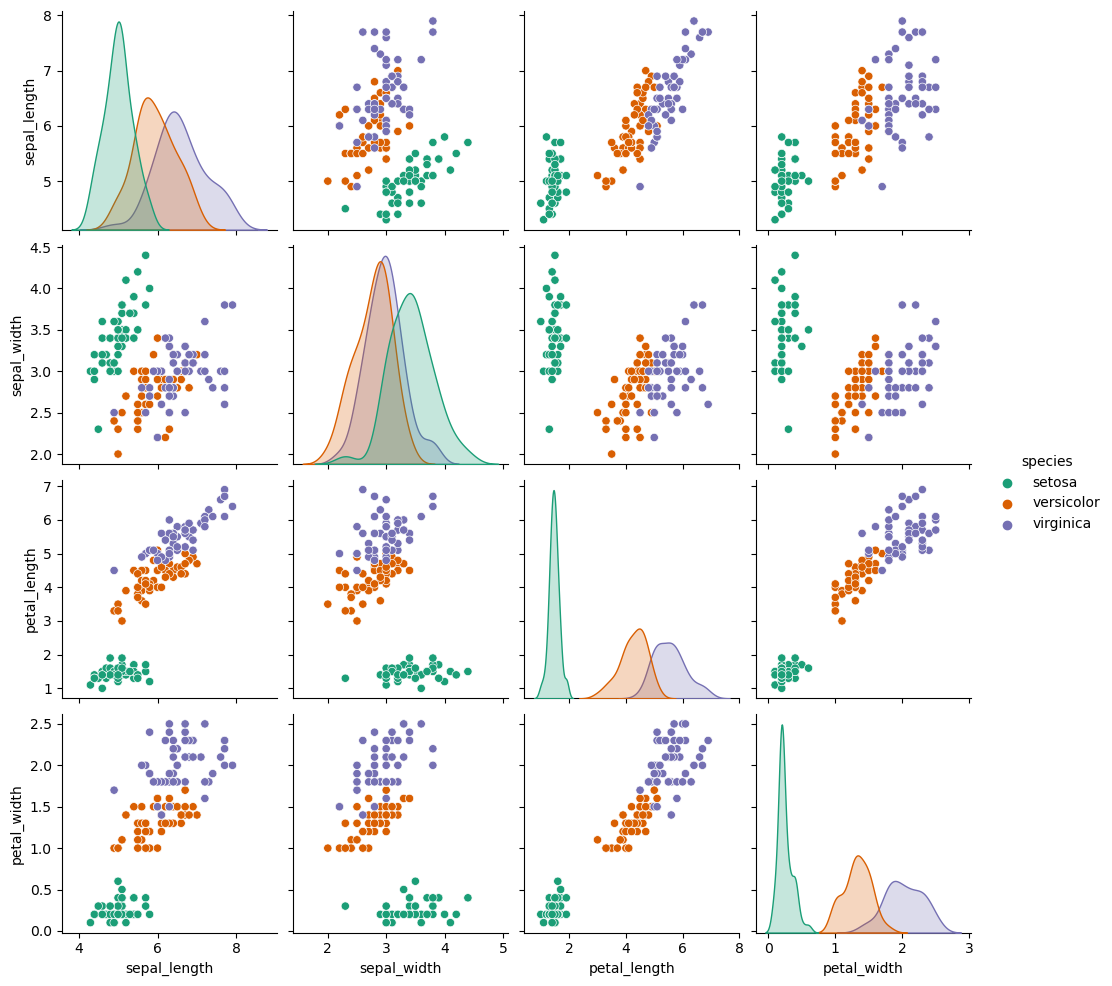

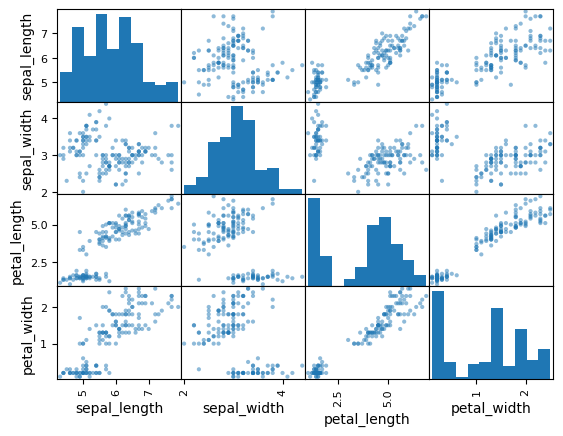

In [23]:
y=data.species
x=data.drop("species",axis=1)
sns.pairplot(data,hue='species',palette='Dark2')
from pandas.plotting import scatter_matrix
scatter_matrix(data)

In [24]:


from sklearn.preprocessing import LabelEncoder,StandardScaler
sc=StandardScaler()
df=sc.fit_transform(x)
x=pd.DataFrame(df,columns=data.columns[:-1])
le=LabelEncoder()
y=le.fit_transform(y)
y
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=103)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
p=knn.predict(x_test)
p

array([1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2,
       2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1,
       0])

In [38]:
knn.score(x_test,y_test)

1.0

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,p)

1.0

In [40]:
acc=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    z=knn.score(x_test,y_test)
    acc.append(z)

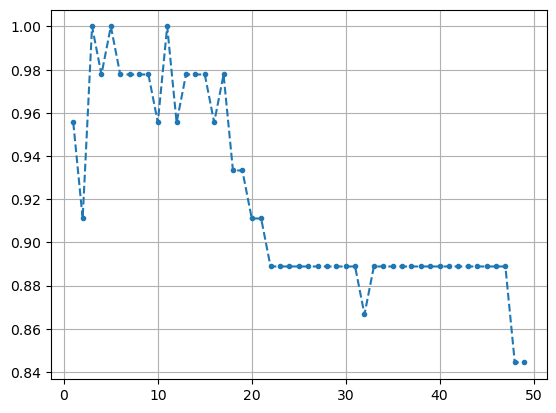

In [41]:
plt.plot(range(1,50),acc,'--.')
plt.grid()

In [42]:
max(acc)

1.0

<Axes: >

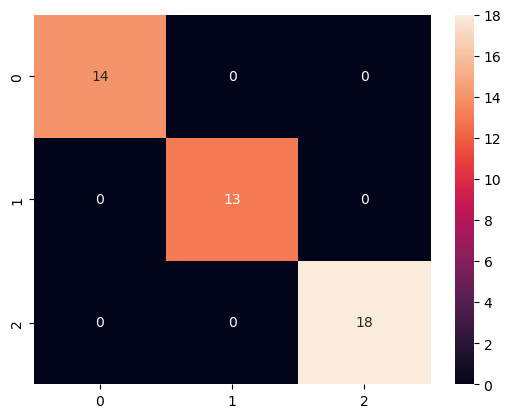

In [44]:
cm=confusion_matrix(y_test,p)
sns.heatmap(cm,annot=True)